### DATASET link : https://www.kaggle.com/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount

# Credit Card Fraud Detection Using Machine Learning Algorithms

#### The goal of this project is to track the pattern of all the transactions and if any pattern is abnormal then the transaction should be classified as fraud.

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
import sklearn.metrics as metrics


#### Import CSV file

In [2]:
dataset = pd.read_csv('c:/users/shekh/Downloads/tableau course udemy/creditcard.csv')

In [3]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Lets drop the time column since its not useful for our model and its an incrementing value

In [4]:
dataset.drop('Time',inplace=True,axis = 1)

In [5]:
# check the shape of dataset
dataset.shape

(284807, 30)

so we have a total of 284807 transaction    

lets check for nan values

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.shape

(284807, 30)

Thus we can see no data has been dropped

##### we need to check for any duplicate transaction taking place and remove it if present to bring down the runtime of the model.

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.shape

(275663, 30)

In [10]:
284807-275663

9144

Thus we removed 9144 duplicates form the dataset.

In [11]:
# since most of our columns are scaled we need to scale the amount variable

# We will use RobustScaler as it is less prone to outliers since it uses median to scale the data and median is not affected by outliers(inshort it preserves the outliers) 
# and in case of standardscaler it uses mean to scale the data.

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [12]:
dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [13]:
dataset.drop(['Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = dataset['scaled_amount']
dataset.drop(['scaled_amount'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)

In [15]:
dataset.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.710094,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.285967,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.821627,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.355251,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.628311,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


now the dataset is scaled

<AxesSubplot:>

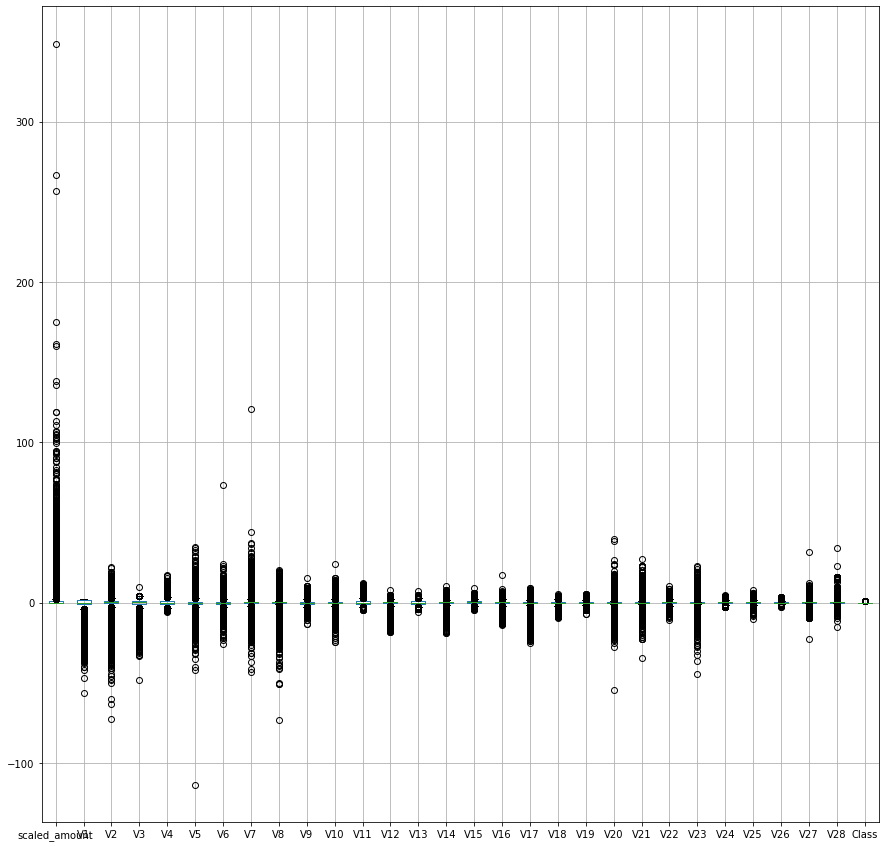

In [16]:
dataset.boxplot(figsize= (15,15))

In [17]:
# lets check for number of normal and fraud transaction
fraud = len(dataset[dataset['Class'] == 1])
normal = len(dataset[dataset['Class'] == 0])
percent_normal = normal/len(dataset)*100
percent_fraud = fraud/len(dataset)*100

In [18]:
print('Number of Fraud Transactions are: {}'.format(fraud))
print('Number of Normal Transactions are: {}'.format(normal))
print(' ')
print('Percentage of Fraud Transactions are: {:.2f}%'.format(percent_fraud))
print('Percentage of Normal Transactions are: {:.2f}%'.format(percent_normal))


Number of Fraud Transactions are: 473
Number of Normal Transactions are: 275190
 
Percentage of Fraud Transactions are: 0.17%
Percentage of Normal Transactions are: 99.83%


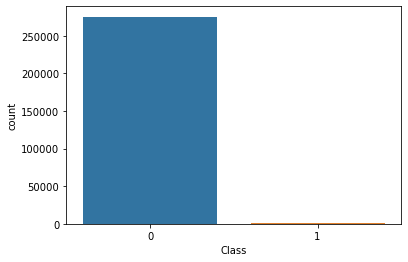

In [19]:
sns.countplot('Class',data = dataset);

In [20]:
X = dataset.drop(['Class'],axis=1)
y = dataset['Class']

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
# Since we have imbalanced Dataset we need to balance it for the model
# we will be using Adasyn method to balance the dataset

In [23]:
#pip install -U imbalanced-learn

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN 

In [25]:
# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000,
# random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 275190, 1: 473})
Resampled dataset shape Counter({1: 275208, 0: 275190})


In [26]:
X_res.shape

(550398, 29)

In [27]:
y_res.shape

(550398,)

#### now lets do the train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,stratify= y_res)

In [29]:
normal_res = len(y_train[y_train == 0])
fraud_res = len(y_train[y_train == 1])

In [30]:
print('Number of normal transaction in y_train are: {}'.format(normal_res))
print('Number of fraud transaction in y_train are: {}'.format(fraud_res))

Number of normal transaction in y_train are: 192633
Number of fraud transaction in y_train are: 192645


#### thus we can see both the class type are equally distributed in the y_train set

### Lets build the machine learning model 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [33]:
classifiers1 =  RandomForestClassifier()

In [34]:
skf = StratifiedKFold(n_splits=5)
classifiers1.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
training_score = cross_val_score(classifiers1, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  100.0 % accuracy score


In [36]:
y_pred = classifiers1.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.9998546511627907

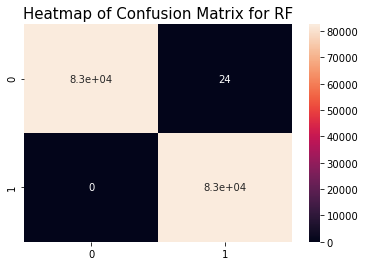

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for RF', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       1.00      1.00      1.00     82563

    accuracy                           1.00    165120
   macro avg       1.00      1.00      1.00    165120
weighted avg       1.00      1.00      1.00    165120



In [41]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])

In [42]:
print_confusion_matrix(y_test, y_pred)

True positive =  82533
False positive =  0
False negative =  24
True negative =  82563


In [43]:
 from sklearn.metrics import fbeta_score

In [44]:
fb_rf = fbeta_score(y_test, y_pred, beta=1)
fb_rf

0.9998546775658492

## Logistic Regression

In [45]:
clf_lr = LogisticRegression()

In [46]:
skf = StratifiedKFold(n_splits=5)
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
training_score_lr = cross_val_score(clf_lr, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score_lr.mean(), 2) * 100, "% accuracy score")

Classifiers:  88.0 % accuracy score


In [48]:
y_pred_lr = clf_lr.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred_lr)

0.8831031976744186

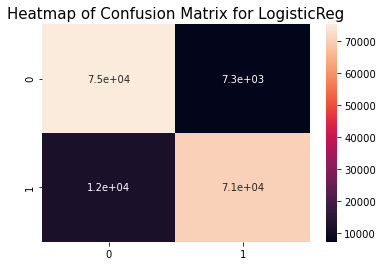

In [50]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.title('Heatmap of Confusion Matrix for LogisticReg', fontsize = 15)
sns.heatmap(cm_lr, annot = True)
plt.show()

In [51]:
print_confusion_matrix(y_test, y_pred_lr)

True positive =  75257
False positive =  12002
False negative =  7300
True negative =  70561


In [52]:
fb_lr = fbeta_score(y_test, y_pred_lr, beta=1)
fb_lr

0.8796813444372413

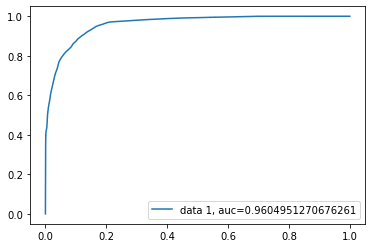

In [53]:
y_pred_proba = clf_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
import scikitplot as skplt #to make things easy


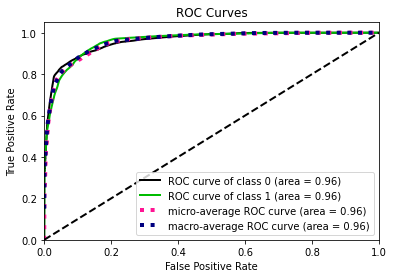

In [55]:
y_pred_prob = clf_lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

### Final Result

In [56]:
list = [fb_lr,fb_rf]


if (fb_lr == max(list)):
    print('The best F1 score is {:.7f} for Logistic Regression model.'.format(fb_lr))
else: 
    print('The best F1 score is {:.7f} for Random Forest model.'.format(fb_rf))

The best F1 score is 0.9998547 for Random Forest model.


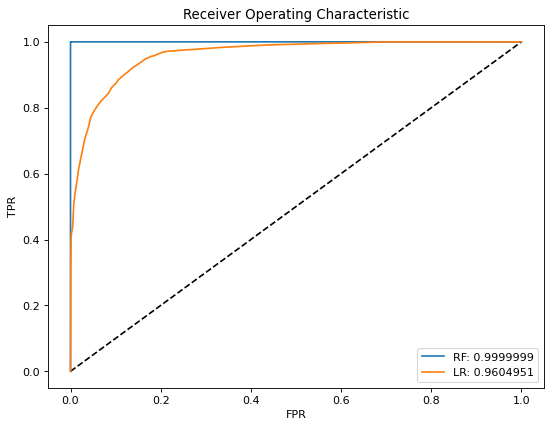

In [57]:
#ROC Curve

figure(figsize=(8, 6), dpi=80)
from sklearn.metrics import roc_curve
y_pred_prob1 = classifiers1.predict_proba(X_test)[:,1]

fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob1),7)

# y_pred_prob2 = clf_gnb.predict_proba(X_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
# auc2 = round(metrics.roc_auc_score(y_test, y_pred_prob2),4)

y_pred_prob3 = clf_lr.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(y_test, y_pred_prob3),7)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RF: "+str(auc))
# plt.plot(fpr2, tpr2, label= "GNB: "+str(auc2) )
plt.plot(fpr3, tpr3, label= "LR: "+str(auc3))

plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()